In [1]:
import os
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline

In [2]:
if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')
    
DATA_DIR = os.path.join(env+'/data/euclia/ts_bc_cordex/')

In [3]:
c_brit = [('PERROS-GUIREC', [-3.2823, 48.4933]),
          ('ROSTRENEN',[-3.1828, 48.1353]), 
          ('BRENNILIS',[-3.5107, 48.2137]),
          ('GUIPAVAS', [-4.2443, 48.2639]), 
          ('ILE-DE-BATZ', [-4.0043, 48.4447]),
          ('PLOGOFF',[-4.4355, 48.0220]),
          ('BLERUAIS',[-2.0727,48.0641]),
          ('ERBREE',[-1.0731,48.0556]),
          ('MEZIERES-SUR-COUESNON',[-1.2619,48.1831]),         
          ('AIGREFEUILLE-SUR-MAINE',[-1.2331,47.0359]),
          ('GUEMENE-PENFAO',[-1.4956,47.3759]),
          ('LA_HAIE-FOUASSIERE',[-1.2305,47.0943]),
          ('NOZAY',[-1.3637,47.3411]),
          ('PONTCHATEAU',[-2.0535,47.2635]),
          ('SAINT-PHILBERT-DE-GRAND-LIEU',[-1.3910,47.0145])]

c_nonsafran = [('AURAY',[47.3933,-2.5816]), 
               ('GROIX',[47.3908,-3.3008]), 
               ('QUEVEN',[47.4546,-3.2608])]

c_uk = [('Oxford_606',[-1.2625, 51.7607]),
        ('Rothamsted_471',[-0.3586,51.8062]),
        ('Wisley_719',[-0.4748,51.3103]),
        ('BognorRegis_782',[-0.6750,50.7810]),
        ('CambridgeBG_454',[0.1310,52.1930]),
        ('Eastbourne_808',[0.2850,50.7620]),
        ('EastMalling_744',[-0.4500,51.2870]),
        ('Goodhurst_742',[0.4610,51.0760]),
        ('Hampstead_695',[-0.1780,51.5600]),
        ('HamptonWWks_711',[-0.3780,51.4120]),
        ('Larkhill_888',[-1.8040,51.2010]),
        ('OtterbourneWWks_855',[-1.3340,51.0080]),
        ('WightShanklin_878',[-1.1790,50.6230]),
        ('Woburn_458',[-0.5950,52.0140])]

c_nor = [('CARPIQUET', [-0.2722,49.1048]), 
        
         ('SAINT-GATIEN-DES-BOIS', [0.1001 , 49.2152]),
         ('LES_ANDELYS', [1.2446, 49.1441]),
         ('CONCHES-EN-OUCHE',[0.5616, 48.5719]),
         ('GUICHAINVILLE',[1.1054,48.5837]),
         ('COULOUVRAY-BOISBENATRE',[-1.0606, 48.4707]),
         ('ALENCON',[0.0637 , 48.2644]),
         ('LE_PIN-AU-HARAS',[0.1051, 48.4330]),
         ('TANQUES',[-0.0444, 48.4031]), 
         ('FECAMP',[0.2209, 49.4602]),
         ('GODERVILLE',[0.2213, 49.3841]), 
         ('GOURNAY-EN-BRAY',[1.4259, 49.2841])]

c_southUK = [('Oxford_606',[-1.2625, 51.7607]),
       # ('Rothamsted_471',[-0.3586,51.8062]),
        ('Wisley_719',[-0.4748,51.3103]),
        ('BognorRegis_782',[-0.6750,50.7810]),
        ('CambridgeBG_454',[0.1310,52.1930]),
        ('Eastbourne_808',[0.2850,50.7620]),
        #('EastMalling_744',[-0.4500,51.2870]),
        #('Goodhurst_742',[0.4610,51.0760]),
        #('Hampstead_695',[-0.1780,51.5600]),
        ('HamptonWWks_711',[-0.3780,51.4120]),
        #('Larkhill_888',[-1.8040,51.2010]),
        ('OtterbourneWWks_855',[-1.3340,51.0080]),
#        ('WightShanklin_878',[-1.1790,50.6230]),
        ('Woburn_458',[-0.5950,52.0140])]

c_westFRA = [('PERROS-GUIREC', [-3.2823, 48.4933]),
          ('ROSTRENEN',[-3.1828, 48.1353]), 
          ('BRENNILIS',[-3.5107, 48.2137]),
          ('GUIPAVAS', [-4.2443, 48.2639]), 
          ('ILE-DE-BATZ', [-4.0043, 48.4447]),
          ('PLOGOFF',[-4.4355, 48.0220]),
          ('BLERUAIS',[-2.0727,48.0641]),
          ('ERBREE',[-1.0731,48.0556]),
          ('MEZIERES-SUR-COUESNON',[-1.2619,48.1831]),         
          ('AIGREFEUILLE-SUR-MAINE',[-1.2331,47.0359]),
          ('GUEMENE-PENFAO',[-1.4956,47.3759]),
          ('LA_HAIE-FOUASSIERE',[-1.2305,47.0943]),
          ('NOZAY',[-1.3637,47.3411]),
          ('PONTCHATEAU',[-2.0535,47.2635]),
          ('SAINT-PHILBERT-DE-GRAND-LIEU',[-1.3910,47.0145]), 
          ('ENGLESQUEVILLE-LA-PERCEE',[-0.5722 , 49.2312]), ]

In [4]:
obs = pd.read_csv(os.path.join(env+'/data/euclia/allstations.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0])

In [5]:
NUM_POSTE =  [ (14137001,'CARPIQUET'),(14239001,'ENGLESQUEVILLE-LA-PERCEE'),
              (14578001,'SAINT-GATIEN-DES-BOIS'),(22168001,'PERROS-GUIREC'),
              (22266001,'ROSTRENEN'),(27016001,'LES_ANDELYS'),
              (27165001,'CONCHES-EN-OUCHE'),(27306001,'GUICHAINVILLE'),
              (29018001,'BRENNILIS'),(29075001,'GUIPAVAS'),(29082001,'ILE-DE-BATZ'),
              (29168001,'PLOGOFF'),(50144001,'COULOUVRAY-BOISBENATRE'),
              (61001001,'ALENCON'),(61328001,'LE_PIN-AU-HARAS'),(61479001,'TANQUES'),
              (76259001,'FECAMP'),(76302002,'GODERVILLE'),(76312001,'GOURNAY-EN-BRAY'),
              (35026001,'BLERUAIS'),(35105001,'ERBREE'),(35178001,'MEZIERES-SUR-COUESNON'),
              (44002001,'AIGREFEUILLE-SUR-MAINE'),(44067001,'GUEMENE-PENFAO'),
              (44070001,'LA_HAIE-FOUASSIERE'),(44113001,'NOZAY'),(44129001,'PONTCHATEAU'),
              (44188001,'SAINT-PHILBERT-DE-GRAND-LIEU'),(56007001,'AURAY'),(56069001,'GROIX'),
              (56185001,'QUEVEN')]

ln = obs.columns
for name in ln: 
    if 'ID' in name:
        key = [item for item in NUM_POSTE if int(name.strip('ID')) in item]
        nn = key[0][1]
        obs.rename(columns={name: nn}, inplace=True) 

In [6]:
r_arr = []
a_arr = []
for st_name in obs.columns.values: 

    admin = 'default' #np.full((len(jd)),'default', dtype='|S10')
    for key in c_brit:
        if key[0] in st_name:  
            admin = 'Brittany' #np.full((len(jd)),'Brittany', dtype='|S10')
    for key in c_uk: 
        if key[0] in st_name:  
            admin = 'southUK'# np.full((len(jd)),'southUK', dtype='|S10')
    for key in c_nor: 
        if key[0] in st_name:  
            admin = 'Normandy' #np.full((len(jd)),'Normandy', dtype='|S10')
    for key in c_nonsafran: 
        if key[0] in st_name:  
            admin = 'non_SAFRAN' #np.full((len(jd)),'Normandy', dtype='|S10')

    region = 'NON' #np.full((len(jd)),'default', dtype='|S10')
    for key in c_southUK:
        if key[0] in st_name:  
            region = 'south_UK' #np.full((len(jd)),'Brittany', dtype='|S10')
    for key in c_westFRA: 
        if key[0] in st_name:  
            region = 'west_FRA'# np.full((len(jd)),'southUK', dtype='|S10')
    r_arr.append(region)
    a_arr.append(admin)
    

In [7]:
index_arrays = [r_arr,a_arr, obs.columns.values] #np.array([region,station,gcm,rcm, jd]).tolist()
mi = pd.MultiIndex.from_arrays(index_arrays, names=('region', 'admin', 'station'))
#test.columns.names = mi
obs = DataFrame( obs.values  , index=obs.index, columns=mi)

In [8]:
rs = obs.resample('BQ-NOV', how=sum)
pr_obs = rs[rs.index.month==2]
pr_obs = pr_obs['1900':'2014'].reindex_axis(sorted(pr_obs.columns), axis=1)
pr_obs.index.name = 'Date'
pr_obs.head()

region          NON                                                           \
admin      Normandy                                                            
station     ALENCON CARPIQUET CONCHES-EN-OUCHE COULOUVRAY-BOISBENATRE FECAMP   
Date                                                                           
1900-02-28      NaN       NaN              NaN                    NaN    NaN   
1901-02-28      NaN       NaN              NaN                    NaN    NaN   
1902-02-28      NaN       NaN              NaN                    NaN    NaN   
1903-02-27      NaN       NaN              NaN                    NaN    NaN   
1904-02-29      NaN       NaN              NaN                    NaN    NaN   

region                                                           \
admin                                                             
station    GODERVILLE GOURNAY-EN-BRAY GUICHAINVILLE LES_ANDELYS   
Date                                                              
1900-02-28        NaN             NaN           NaN         NaN   
1901-02-28        NaN             NaN           NaN         NaN   
1902-02-28        NaN             NaN           NaN         NaN   
1903-02-27        NaN             NaN           NaN         NaN   
1904-02-29        NaN             NaN           NaN         NaN   

region                               ...               west_FRA  \
admin                                ...               Brittany   
station    LE_PIN-AU-HARAS           ...            ILE-DE-BATZ   
Date                                 ...                          
1900-02-28             NaN           ...                    NaN   
1901-02-28             NaN           ...                    NaN   
1902-02-28             NaN           ...                    NaN   
1903-02-27             NaN           ...                    NaN   
1904-02-29             NaN           ...                    NaN   

region                                                                   \
admin                                                                     
station    LA_HAIE-FOUASSIERE MEZIERES-SUR-COUESNON NOZAY PERROS-GUIREC   
Date                                                                      
1900-02-28                NaN                   NaN   NaN           NaN   
1901-02-28                NaN                   NaN   NaN           NaN   
1902-02-28                NaN                   NaN   NaN           NaN   
1903-02-27                NaN                   NaN   NaN           NaN   
1904-02-29                NaN                   NaN   NaN           NaN   

region                                                                 \
admin                                                                   
station    PLOGOFF PONTCHATEAU ROSTRENEN SAINT-PHILBERT-DE-GRAND-LIEU   
Date                                                                    
1900-02-28     NaN         NaN       NaN                          NaN   
1901-02-28     NaN         NaN       NaN                          NaN   
1902-02-28     NaN         NaN       NaN                          NaN   
1903-02-27     NaN         NaN       NaN                          NaN   
1904-02-29     NaN         NaN       NaN                          NaN   

region                               
admin                       default  
station    ENGLESQUEVILLE-LA-PERCEE  
Date                                 
1900-02-28                      NaN  
1901-02-28                      NaN  
1902-02-28                      NaN  
1903-02-27                      NaN  
1904-02-29                      NaN  

[5 rows x 45 columns]

In [9]:
obs.head()

region       south_UK            NON   south_UK                  \
admin         southUK        southUK    southUK                   
station    Oxford_606 Rothamsted_471 Wisley_719 BognorRegis_782   
19000101                                                          
1900-01-02        0.4            NaN        NaN             NaN   
1900-01-03        4.4            NaN        NaN             NaN   
1900-01-04        0.7            NaN        NaN             NaN   
1900-01-05        0.0            NaN        NaN             NaN   
1900-01-06       17.3            NaN        NaN             NaN   

region                                                NON                \
admin                                             southUK                 
station    CambridgeBG_454 Eastbourne_808 EastMalling_744 Goodhurst_742   
19000101                                                                  
1900-01-02             1.5            0.5             NaN           NaN   
1900-01-03             6.9            7.1             NaN           NaN   
1900-01-04             3.3            1.5             NaN           NaN   
1900-01-05             0.0            0.0             NaN           NaN   
1900-01-06            12.2           14.0             NaN           NaN   

region                          south_UK       ...                    NON  \
admin                            southUK       ...               Normandy   
station    Hampstead_695 HamptonWWks_711       ...       CONCHES-EN-OUCHE   
19000101                                       ...                          
1900-01-02           NaN             NaN       ...                    NaN   
1900-01-03           NaN             NaN       ...                    NaN   
1900-01-04           NaN             NaN       ...                    NaN   
1900-01-05           NaN             NaN       ...                    NaN   
1900-01-06           NaN             NaN       ...                    NaN   

region                              west_FRA                    NON  \
admin                               Brittany               Normandy   
station    GUICHAINVILLE GODERVILLE  PLOGOFF COULOUVRAY-BOISBENATRE   
19000101                                                              
1900-01-02           NaN        NaN      NaN                    NaN   
1900-01-03           NaN        NaN      NaN                    NaN   
1900-01-04           NaN        NaN      NaN                    NaN   
1900-01-05           NaN        NaN      NaN                    NaN   
1900-01-06           NaN        NaN      NaN                    NaN   

region                          west_FRA                                     \
admin      non_SAFRAN           Brittany                                      
station         AURAY LA_HAIE-FOUASSIERE AIGREFEUILLE-SUR-MAINE ILE-DE-BATZ   
19000101                                                                      
1900-01-02        NaN                NaN                    NaN         NaN   
1900-01-03        NaN                NaN                    NaN         NaN   
1900-01-04        NaN                NaN                    NaN         NaN   
1900-01-05        NaN                NaN                    NaN         NaN   
1900-01-06        NaN                NaN                    NaN         NaN   

region                 NON  
admin             Normandy  
station    LE_PIN-AU-HARAS  
19000101                    
1900-01-02             NaN  
1900-01-03             NaN  
1900-01-04             NaN  
1900-01-05             NaN  
1900-01-06             NaN  

[5 rows x 45 columns]

In [10]:
# get the analogs files 
#filecorrnk55_85 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1955-1985.analog30corrnk.1d.all1948.dat')
#filecorrnk75_05 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1975-2005.analog30corrnk.1d.all1948.dat')
filerms55_84 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1955-1984.analog30rms.1d.all1948.dat')
filerms65_94 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1965-1994.analog30rms.1d.all1948.dat')
filerms75_04 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1975-2004.analog30rms.1d.all1948.dat')
filerms85_14 = os.path.join(env+'/data/NCEP/slpano-NA_ref_1985-2014.analog30rms.1d.all1948.dat')
cnames = ['date_an1','date_an2','date_an3','date_an4','date_an5','date_an6','date_an7','date_an8','date_an9','date_an10','date_an11','date_an12','date_an13','date_an14','date_an15','date_an16','date_an17','date_an18','date_an19','date_an20','dis1','dis2','dis3','dis4','dis5','dis6','dis7','dis8','dis9','dis10','dis11','dis12','dis13','dis14','dis15','dis16','dis17','dis18','dis19','dis20','cor1','cor2','cor3','cor4','cor5','cor6','cor7','cor8','cor9','cor10','cor11','cor12','cor13','cor14','cor15','cor16','cor17','cor18','cor19','cor20']

In [11]:
rms55_84 = pd.read_csv(filerms55_84,
                 parse_dates = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                 # header=None,
                 # names = cnames,
                 sep=' ',
                 keep_date_col = True,
                 index_col =[0])
rms55_84.index.name = 'date'
rms55_84.columns = cnames

rms65_94 = pd.read_csv(filerms65_94,
                 parse_dates = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                 # header=None,
                 # names = cnames,
                 sep=' ',
                 keep_date_col = True,
                 index_col =[0])
rms65_94.index.name = 'date'
rms65_94.columns = cnames

rms75_04 = pd.read_csv(filerms75_04,
                 parse_dates = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                 # header=None,
                 # names = cnames,
                 sep=' ',
                 keep_date_col = True,
                 index_col =[0])
rms75_04.index.name = 'date'
rms75_04.columns = cnames

rms85_14 = pd.read_csv(filerms85_14,
                 parse_dates = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                 # header=None,
                 # names = cnames,
                 sep=' ',
                 keep_date_col = True,
                 index_col =[0])
rms85_14.index.name = 'date'
rms85_14.columns = cnames

In [12]:
pr_obs_south_UK = pr_obs.xs(['south_UK'], level=['region'], axis=1) #'south_UK' in region or 'west_FRA'
pr_obs_west_FRA = pr_obs.xs(['west_FRA'], level=['region'], axis=1) #'south_UK' in region or 'west_FRA'
obs_south_UK = obs.xs(['south_UK'], level=['region'], axis=1) #'south_UK' in region or 'west_FRA'
obs_west_FRA = obs.xs(['west_FRA'], level=['region'], axis=1) #'south_UK' in region or 'west_FRA'

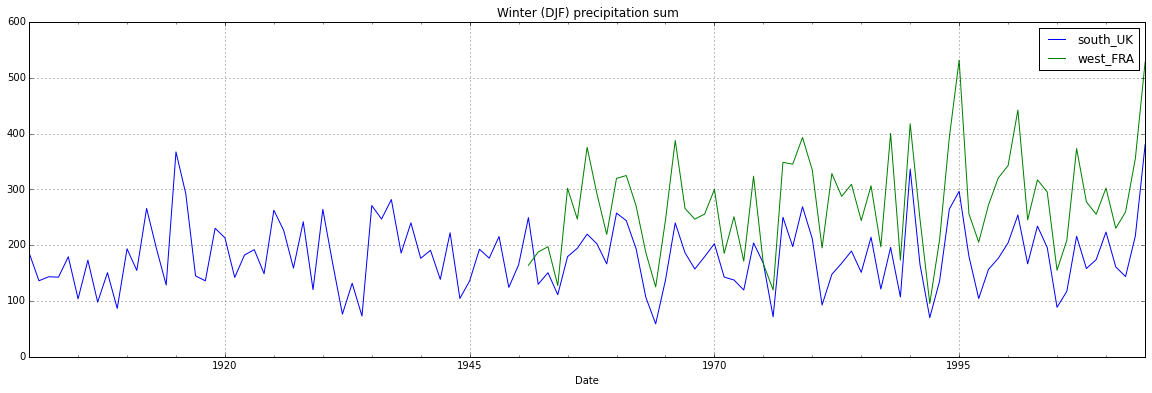

In [13]:
fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

pr_obs_south_UK.mean(axis=1, skipna=True).plot(legend = True, label='south_UK')
pr_obs_west_FRA.mean(axis=1, skipna=True).plot(legend = True, label='west_FRA')

plt.title('Winter (DJF) precipitation sum')

In [14]:
start = dt.datetime.strptime('19510101','%Y%m%d') #19541201
end = dt.datetime.strptime('20140501','%Y%m%d')
rng = pd.date_range(start,end, freq='D')

In [15]:
south_UK_55 = DataFrame(columns = cnames )
south_UK_55.index.name = 'date'
west_FRA_55 = DataFrame(columns = cnames )
west_FRA_55.index.name = 'date'

south_UK_55_file = os.path.join(env+'/data/euclia/val_rms55_84_south_UK.csv') 
if (os.path.exists(south_UK_55_file)):
    south_UK_55 = pd.read_csv(south_UK_55_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    south_UK_55.index.name = 'date'  
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms55_84.loc[i,:]
            south_UK_55 = south_UK_55.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                south_UK_55.loc[i,day] = obs_south_UK.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    south_UK_55.to_csv(south_UK_55_file)
print 'selection of analogs successfully done'

selection of analogs successfully done


In [ ]:
west_FRA_55 = DataFrame(columns = cnames )
west_FRA_55.index.name = 'date'

west_FRA_55_file = os.path.join(env+'/data/euclia/val_rms55_84_west_FRA.csv') 
if (os.path.exists(west_FRA_55_file)):
    west_FRA_55 = pd.read_csv(west_FRA_55_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    west_FRA_55.index.name = 'date'
    
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms55_84.loc[i,:]
            west_FRA_55 = west_FRA_55.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                west_FRA_55.loc[i,day] = obs_west_FRA.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    west_FRA_55.to_csv(west_FRA_55_file)
print 'selection of analogs successfully done'

In [ ]:
south_UK_65 = DataFrame(columns = cnames )
south_UK_65.index.name = 'date'

south_UK_65_file = os.path.join(env+'/data/euclia/val_rms65_94_south_UK.csv') 
if (os.path.exists(south_UK_65_file)):
    south_UK_65 = pd.read_csv(south_UK_65_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    south_UK_65.index.name = 'date'  
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms65_94.loc[i,:]
            south_UK_65 = south_UK_65.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                south_UK_65.loc[i,day] = obs_south_UK.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
        print i 
    south_UK_65.to_csv(south_UK_65_file)
      
print 'selection of analogs successfully done'

1951-01-01 00:00:00
1951-01-02 00:00:00
1951-01-03 00:00:00
1951-01-04 00:00:00
1951-01-05 00:00:00
1951-01-06 00:00:00
1951-01-07 00:00:00
1951-01-08 00:00:00
1951-01-09 00:00:00
1951-01-10 00:00:00
1951-01-11 00:00:00
1951-01-12 00:00:00
1951-01-13 00:00:00
1951-01-14 00:00:00
1951-01-15 00:00:00
1951-01-16 00:00:00
1951-01-17 00:00:00
1951-01-18 00:00:00
1951-01-19 00:00:00
1951-01-20 00:00:00
1951-01-21 00:00:00
1951-01-22 00:00:00
1951-01-23 00:00:00
1951-01-24 00:00:00
1951-01-25 00:00:00
1951-01-26 00:00:00
1951-01-27 00:00:00
1951-01-28 00:00:00
1951-01-29 00:00:00
1951-01-30 00:00:00
1951-01-31 00:00:00
1951-02-01 00:00:00
1951-02-02 00:00:00
1951-02-03 00:00:00
1951-02-04 00:00:00
1951-02-05 00:00:00
1951-02-06 00:00:00
1951-02-07 00:00:00
1951-02-08 00:00:00
1951-02-09 00:00:00
1951-02-10 00:00:00
1951-02-11 00:00:00
1951-02-12 00:00:00
1951-02-13 00:00:00
1951-02-14 00:00:00
1951-02-15 00:00:00
1951-02-16 00:00:00
1951-02-17 00:00:00
1951-02-18 00:00:00
1951-02-19 00:00:00


In [79]:
west_FRA_65 = DataFrame(columns = cnames )
west_FRA_65.index.name = 'date'

west_FRA_65_file = os.path.join(env+'/data/euclia/val_rms65_94_west_FRA.csv') 
if (os.path.exists(west_FRA_65_file)):
    west_FRA_65 = pd.read_csv(west_FRA_65_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    west_FRA_65.index.name = 'date'
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms65_94.loc[i,:]
            west_FRA_65 = west_FRA_65.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                west_FRA_65.loc[i,day] = obs_west_FRA.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    west_FRA_65.to_csv(west_FRA_65_file)
print 'selection of analogs successfully done'

In [80]:
south_UK_75 = DataFrame(columns = cnames )
south_UK_75.index.name = 'date'
west_FRA_75 = DataFrame(columns = cnames )
west_FRA_75.index.name = 'date'

south_UK_75_file = os.path.join(env+'/data/euclia/val_rms75_04_south_UK.csv') 
if (os.path.exists(south_UK_75_file)):
    south_UK_75 = pd.read_csv(south_UK_75_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    south_UK_75.index.name = 'date'  
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms75_04.loc[i,:]
            south_UK_75 = south_UK_75.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                south_UK_75.loc[i,day] = obs_south_UK.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    south_UK_75.to_csv(south_UK_75_file)
print 'selection of analogs successfully done'

west_FRA_75_file = os.path.join(env+'/data/euclia/val_rms75_04_west_FRA.csv') 
if (os.path.exists(west_FRA_75_file)):
    west_FRA_75 = pd.read_csv(west_FRA_75_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    west_FRA_75.index.name = 'date'
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms75_04.loc[i,:]
            west_FRA_75 = west_FRA_75.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                west_FRA_75.loc[i,day] = obs_west_FRA.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    west_FRA_75.to_csv(west_FRA_75_file)
print 'selection of analogs successfully done'

In [ ]:
south_UK_85 = DataFrame(columns = cnames )
south_UK_85.index.name = 'date'
west_FRA_85 = DataFrame(columns = cnames )
west_FRA_85.index.name = 'date'

south_UK_85_file = os.path.join(env+'/data/euclia/val_rms85_14_south_UK.csv') 
if (os.path.exists(south_UK_85_file)):
    south_UK_85 = pd.read_csv(south_UK_85_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    south_UK_85.index.name = 'date'  
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms85_14.loc[i,:]
            south_UK_85 = south_UK_85.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                south_UK_85.loc[i,day] = obs_south_UK.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    south_UK_85.to_csv(south_UK_85_file)
print 'selection of analogs successfully done'

west_FRA_85_file = os.path.join(env+'/data/euclia/val_rms85_14_west_FRA.csv') 
if (os.path.exists(west_FRA_85_file)):
    west_FRA_85 = pd.read_csv(west_FRA_85_file,
                 sep=',',
                 keep_date_col = True,
                 parse_dates = [0],
                 index_col =[0])
    west_FRA_85.index.name = 'date'
else : 
    for i in rng:
        if (i.month == 12 or i.month == 1 or i.month == 2):
            an = rms85_14.loc[i,:]
            west_FRA_85 = west_FRA_85.append(an[cnames[20:60]])
            for day in cnames[0:20]:
                west_FRA_85.loc[i,day] = obs_west_FRA.mean(axis=1, skipna=True).loc[an[day]] # np.squeeze(norm_mean[norm_mean.index == an[day].values].values)
    west_FRA_85.to_csv(west_FRA_85_file)
print 'selection of analogs successfully done'